In [1]:
# Install necessary libraries
!pip install opencv-python-headless tensorflow pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import os
import json
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Define paths
photo_path = "C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos"
photos_json_path = "C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos.json"  # Adjust the path to your JSON file

# Load JSON data (replace this with the actual JSON structure)
photos_df = pd.read_json(photos_json_path, lines=True)

# Inspect the first few rows
print(photos_df.head())

                 photo_id             business_id  \
0  zsvj7vloL4L5jhYyPIuVwg  Nk-SJhPlDBkAZvfsADtccA   
1  HCUdRJHHm_e0OCTlZetGLg  yVZtL5MmrpiivyCIrVkGgA   
2  vkr8T0scuJmGVvN2HJelEA  _ab50qdWOk0DdB6XOrBitw   
3  pve7D6NUrafHW3EAORubyw  SZU9c8V2GuREDN5KgyHFJw   
4  H52Er-uBg6rNrHcReWTD2w  Gzur0f0XMkrVxIwYJvOt2g   

                                             caption    label  
0  Nice rock artwork everywhere and craploads of ...   inside  
1                                                     outside  
2                                     oyster shooter    drink  
3                                      Shrimp scampi     food  
4                                                        food  


In [3]:
photos_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   photo_id     200100 non-null  object
 1   business_id  200100 non-null  object
 2   caption      200100 non-null  object
 3   label        200100 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


In [4]:
photos_df['label' ].unique() 

array(['inside', 'outside', 'drink', 'food', 'menu'], dtype=object)

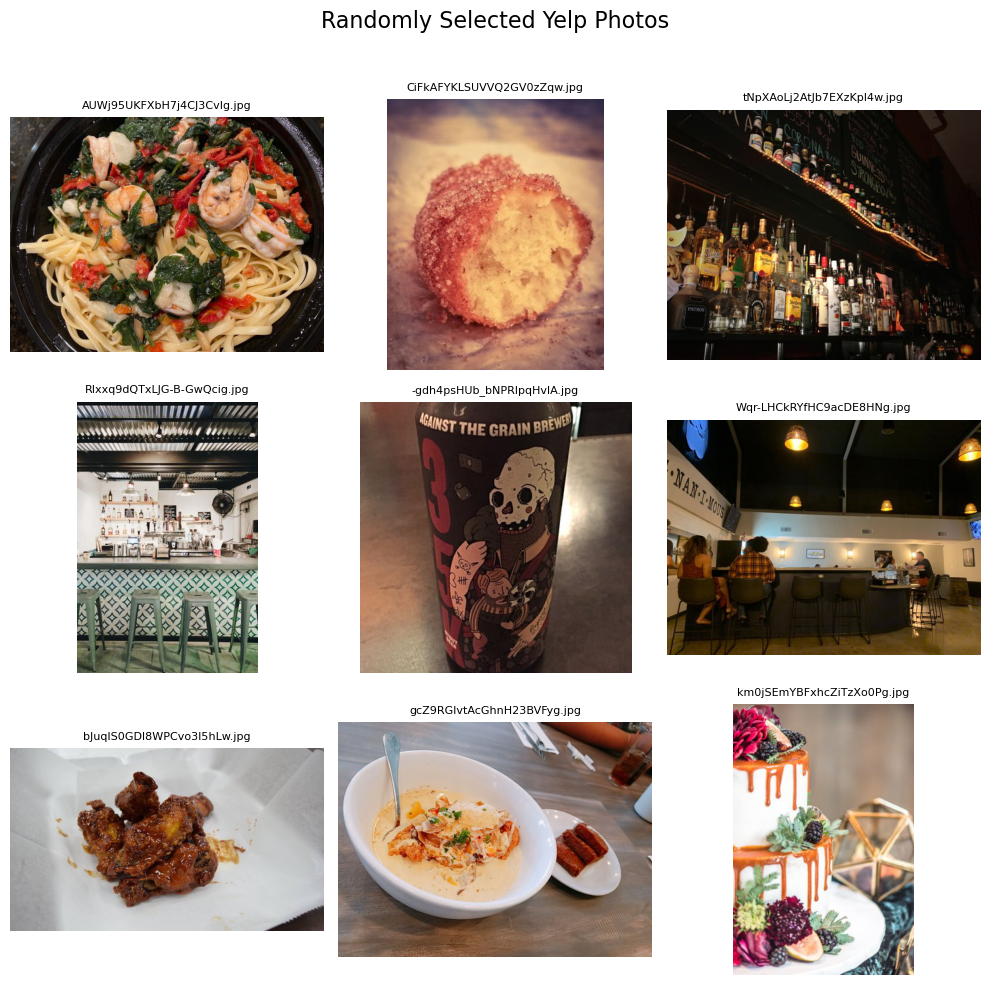

In [5]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing the photos
photos_folder = 'C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos'

# Get a list of all files in the folder
all_photos = os.listdir(photos_folder)

# Filter out non-image files (optional, if needed)
image_files = [f for f in all_photos if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Pick 9 random images from the list
selected_photos = random.sample(image_files, 9)

# Create a 3x3 grid to display images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle("Randomly Selected Yelp Photos", fontsize=16)

# Loop through the selected photos and display them
for i, photo in enumerate(selected_photos):
    # Get the full path of the image
    img_path = os.path.join(photos_folder, photo)
    img = Image.open(img_path)  # Open the image
    
    # Calculate the row and column to place the image in
    row, col = divmod(i, 3)
    
    # Display the image
    axes[row, col].imshow(img)
    axes[row, col].axis('off')  # Hide axes
    axes[row, col].set_title(photo, fontsize=8)  # Set the title of the image

# Adjust layout to prevent overlap of titles and images
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot with the images
plt.show()

C:\Users\rinua\AppData\Local\Temp\ipykernel_20796\447046137.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(label_counts))  # Using a colormap (tab20) for distinct colors


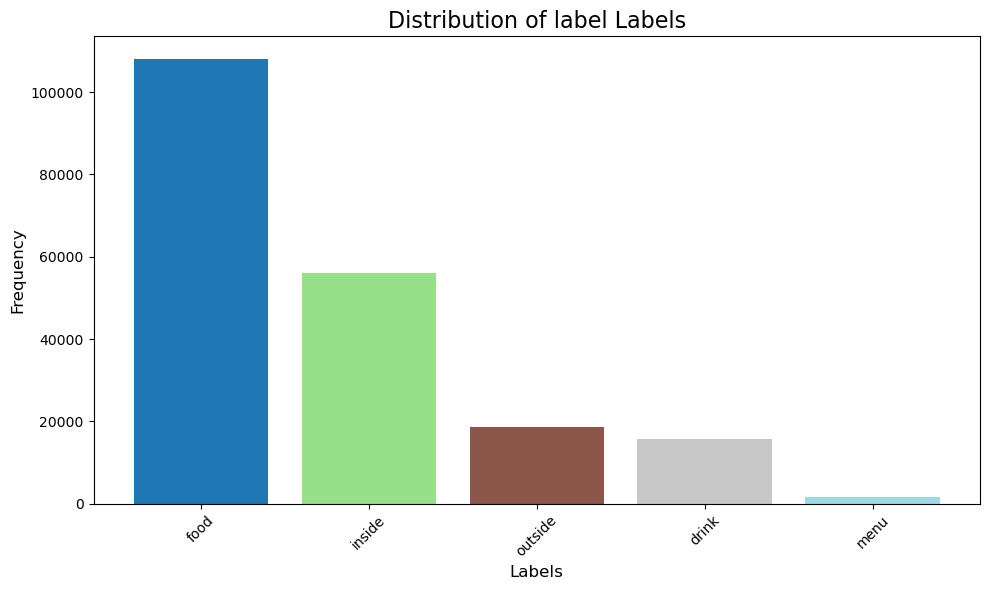

In [6]:
# Check the column names to identify the labels (assuming the column is named 'label' or similar)
if 'category' in photos_df.columns:
    label_column = 'category'
elif 'label' in photos_df.columns:
    label_column = 'label'
else:
    raise ValueError("The JSON file does not contain a label column.")

# Count the occurrences of each label
label_counts = photos_df[label_column].value_counts()

# Generate a list of unique colors (one for each bar)
colors = plt.cm.get_cmap("tab20", len(label_counts))  # Using a colormap (tab20) for distinct colors
color_list = [colors(i) for i in range(len(label_counts))]

# Plot the label distribution with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.index, label_counts.values, color=color_list)

# Add title and labels
plt.title(f"Distribution of {label_column} Labels", fontsize=16)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

sampled_data_list, _ = train_test_split(photos_df, test_size=0.9, stratify=photos_df['label'])

# Convert the sampled dataframe to a list of dictionaries (assuming you want to keep photo_id)
sampled_data_list = sampled_data_list[['photo_id']].to_dict(orient='records')

print(f"Sampled data contains {len(sampled_data_list)} entries.")

Sampled data contains 20010 entries.


In [8]:
import os
import cv2

# Target size for resizing images
TARGET_SIZE = (64, 64)

# Folder where the resized images will be saved
resized_folder = 'C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos/preprocessed_photos_resized'

# Create the folder if it doesn't exist
os.makedirs(resized_folder, exist_ok=True)

# Loop through each entry in the data (replace 'sampled_data_list' with your actual data)
for entry in sampled_data_list:
    try:
        # Extract the photo ID and construct the image path
        photo_id = entry['photo_id']
        img_path = os.path.join(photos_folder, photo_id + '.jpg')

        # Load the image in original color
        img = cv2.imread(img_path)

        if img is None:
            print(f"Unreadable image: {img_path}")
            continue

        # Resize the image
        img_resized = cv2.resize(img, TARGET_SIZE, interpolation=cv2.INTER_AREA)

        # Save the resized image
        save_path = os.path.join(resized_folder, photo_id + '.jpg')
        cv2.imwrite(save_path, img_resized)

    except Exception as e:
        print(f"Error processing {img_path}: {e}")

print("Resizing completed and images saved.")


Unreadable image: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos\RhC7TNmFvbR9GWrlrl5dsA.jpg
Unreadable image: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos\74upe0h6XxwgzqpdnAh_7Q.jpg
Unreadable image: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos\ARwqGQZaT0p-XpYYjMXgQg.jpg
Unreadable image: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos\GPMWGVjuCsa6fadnZsEplw.jpg
Unreadable image: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos\QRUo4vqUu3X9V4eIqBpY8A.jpg
Unreadable image: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos\c73YwNh1JsYR5Hz-u_bOrg.jpg
Unreadable image: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos\hChXG-gGWxzGvalse3EYmw.jpg
Unreadable image: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos\rIhUkEmP-j4NcQVW3YuPYQ.jpg
Unreadable image: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/photos\nKJ7yiPc0E

In [9]:
import os
import cv2

# List to store IDs of corrupted or unreadable images
corrupted_ids = []

# Folder containing resized images (input)
resized_folder = 'C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/preprocessed_photos_resized'

# Folder to save thresholded images (output)
preprocessed_folder = 'C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/preprocessed_photos'
os.makedirs(preprocessed_folder, exist_ok=True)

# Loop through each image in sampled_data_list
for entry in sampled_data_list[:]:  # Use a copy to avoid modifying the list while iterating
    photo_id = entry['photo_id']
    img_path = os.path.join(resized_folder, photo_id + '.jpg')

    try:
        # Load image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Check if the image loaded properly
        if img is None:
            raise ValueError(f"Unreadable image: {img_path}")

        # Normalize pixel intensities to range [0, 255]
        img_normalized = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

        # Apply binary thresholding with threshold value 128
        _, img_thresholded = cv2.threshold(img_normalized, 128, 255, cv2.THRESH_BINARY)

        # Construct the save path
        save_path = os.path.join(preprocessed_folder, photo_id + '_thresholded.jpg')

        # Save the thresholded image if it's valid
        if img_thresholded is not None and img_thresholded.size > 0:
            result = cv2.imwrite(save_path, img_thresholded)
            if result:
                print(f"Image saved: {save_path}")
            else:
                print(f"Failed to save image: {save_path}")
        else:
            print(f"Thresholded image is empty: {save_path}")

    except Exception as e:
        print(f"Corrupted image detected: {img_path} - Error: {e}")
        corrupted_ids.append(photo_id)

# Filter out corrupted entries from the list
sampled_data_list = [entry for entry in sampled_data_list if entry['photo_id'] not in corrupted_ids]

# Print final summary
print(f"Removed {len(corrupted_ids)} corrupted images.")
print("Intensity thresholding completed and images saved.")


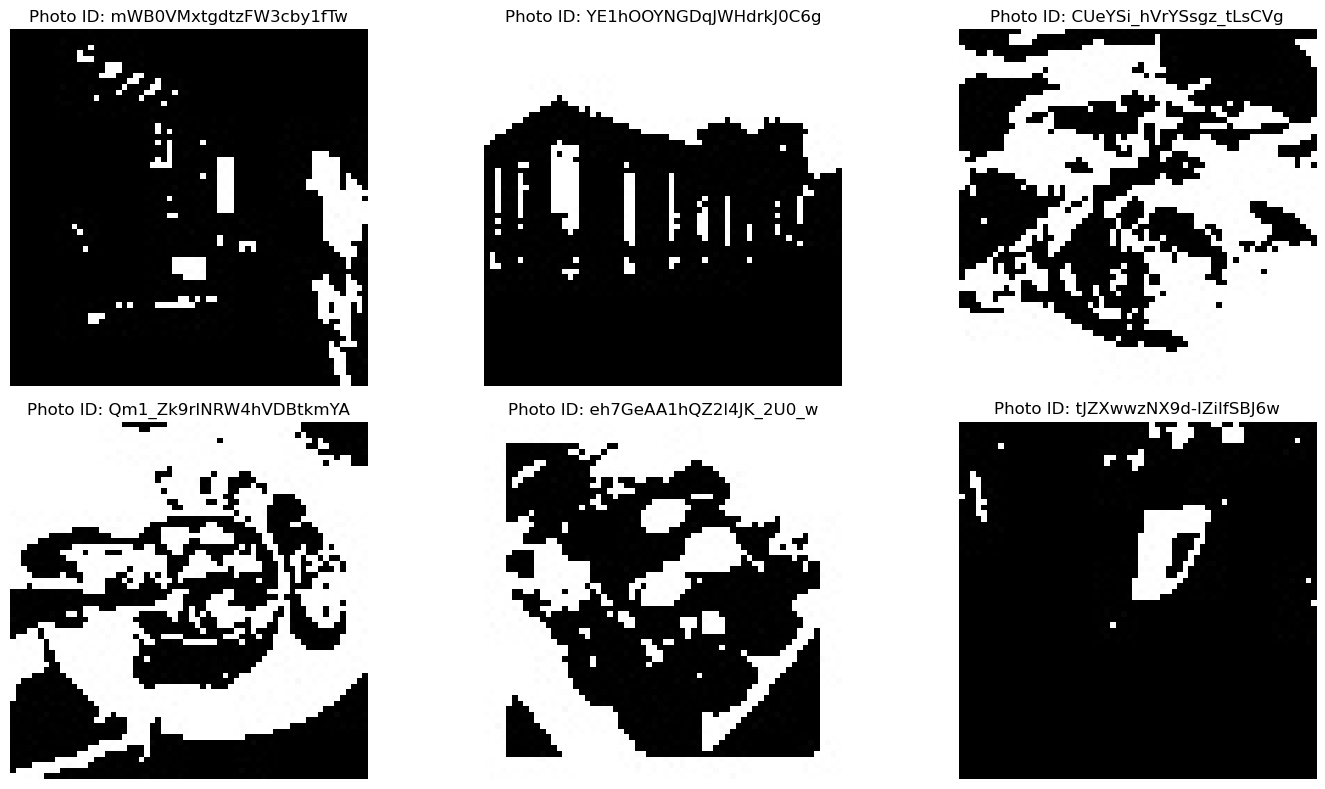

In [26]:
import os
import cv2
import matplotlib.pyplot as plt

# Folder where equalized images are stored
pre_folder = 'C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/preprocessed_photos'

# Set up plot for displaying 6 images
plt.figure(figsize=(15, 8))  # Adjust size as needed

# Show first 6 images from the list
for i, entry in enumerate(sampled_data_list[:6]):
    photo_id = entry['photo_id']
    img_path = os.path.join(pre_folder, photo_id + '_thresholded.jpg')

    # Load image
    img = cv2.imread(img_path)

    if img is not None:
        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Photo ID: {photo_id}")
        plt.axis('off')
    else:
        print(f"Could not load image: {img_path}")

plt.tight_layout()
plt.show()


In [13]:
import os
import cv2

# Define the folder path containing thresholded images
preprocessed_folder = 'C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/preprocessed_photos'
equalized_folder = 'C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/equalized_folder'

os.makedirs(equalized_folder, exist_ok=True)

# Apply histogram equalization to all thresholded images
for entry in sampled_data_list:
    photo_id = entry['photo_id']
    img_path = os.path.join(preprocessed_folder, photo_id + '_thresholded.jpg')

    try:
        # Read the thresholded image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Validate image
        if img is None:
            raise ValueError(f"Unreadable image: {img_path}")

        # Apply histogram equalization
        img_equalized = cv2.equalizeHist(img)

        # Define the path to save the equalized image
        save_path = os.path.join(equalized_folder, photo_id + '_equalized.jpg')

        # Save the equalized image
        result = cv2.imwrite(save_path, img_equalized)
        if result:
            print(f"Equalized image saved: {save_path}")
        else:
            print(f"Failed to save equalized image: {save_path}")

    except Exception as e:
        print(f"Error processing {img_path}: {e}")

print("Histogram equalization completed and images saved.")


Equalized image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/equalized_folder\mWB0VMxtgdtzFW3cby1fTw_equalized.jpg
Equalized image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/equalized_folder\YE1hOOYNGDqJWHdrkJ0C6g_equalized.jpg
Equalized image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/equalized_folder\CUeYSi_hVrYSsgz_tLsCVg_equalized.jpg
Equalized image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/equalized_folder\Qm1_Zk9rINRW4hVDBtkmYA_equalized.jpg
Equalized image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/equalized_folder\eh7GeAA1hQZ2l4JK_2U0_w_equalized.jpg
Equalized image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/equalized_folder\tJZXwwzNX9d-IZiIfSBJ6w_equalized.jpg
Equalized image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/equalized_folder\xzmb4RQCOcHYF3WM9xeWaA_equalized.jpg
Equalized image saved: C:/Users/ri

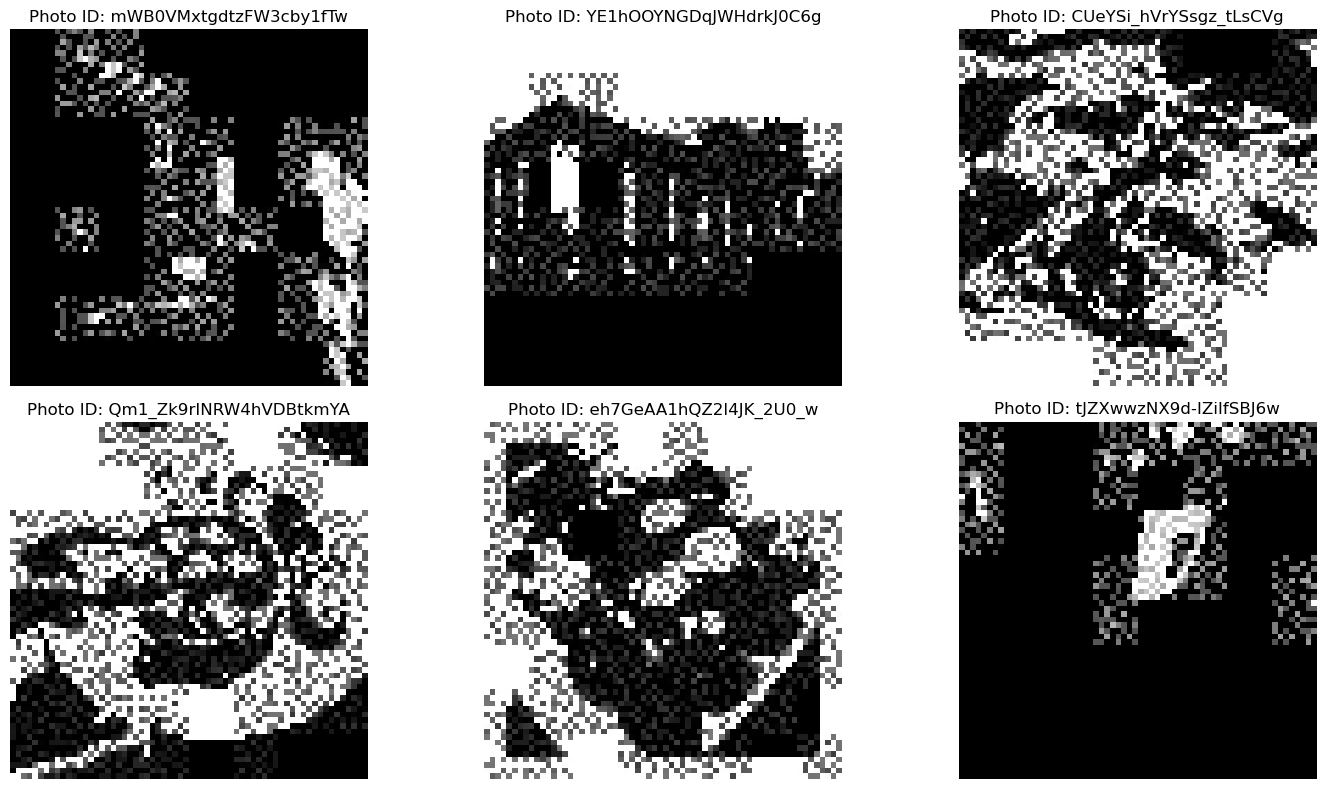

In [20]:
import os
import cv2
import matplotlib.pyplot as plt

# Folder where equalized images are stored
equalized_folder = 'C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/equalized_folder'

# Set up plot for displaying 6 images
plt.figure(figsize=(15, 8))  # Adjust size as needed

# Show first 6 images from the list
for i, entry in enumerate(sampled_data_list[:6]):
    photo_id = entry['photo_id']
    img_path = os.path.join(equalized_folder, photo_id + '_equalized.jpg')

    # Load image
    img = cv2.imread(img_path)

    if img is not None:
        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Photo ID: {photo_id}")
        plt.axis('off')
    else:
        print(f"Could not load image: {img_path}")

plt.tight_layout()
plt.show()


In [14]:
import os
import cv2

# Define folders
equalized_folder = 'C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/equalized_folder'
blurred_folder = 'C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/blurred_folder'

# Create output folder if it doesn't exist
os.makedirs(blurred_folder, exist_ok=True)

# Apply Gaussian Blur to all equalized images
for entry in sampled_data_list:
    photo_id = entry['photo_id']
    img_path = os.path.join(equalized_folder, photo_id + '_equalized.jpg')

    try:
        if not os.path.exists(img_path):
            print(f"Equalized image missing: {img_path}")
            continue

        # Read the equalized image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Validate image
        if img is None:
            raise ValueError(f"Unreadable image: {img_path}")

        # Apply Gaussian Blur with kernel size (5,5)
        img_blurred = cv2.GaussianBlur(img, (5, 5), 0)

        # Define save path
        save_path = os.path.join(blurred_folder, photo_id + '_blurred.jpg')

        # Save blurred image
        result = cv2.imwrite(save_path, img_blurred)
        if result:
            print(f"Blurred image saved: {save_path}")
        else:
            print(f"Failed to save blurred image: {save_path}")

    except Exception as e:
        print(f"Error processing {img_path}: {e}")

print("Gaussian blur applied and images saved.")


Blurred image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/blurred_folder\mWB0VMxtgdtzFW3cby1fTw_blurred.jpg
Blurred image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/blurred_folder\YE1hOOYNGDqJWHdrkJ0C6g_blurred.jpg
Blurred image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/blurred_folder\CUeYSi_hVrYSsgz_tLsCVg_blurred.jpg
Blurred image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/blurred_folder\Qm1_Zk9rINRW4hVDBtkmYA_blurred.jpg
Blurred image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/blurred_folder\eh7GeAA1hQZ2l4JK_2U0_w_blurred.jpg
Blurred image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/blurred_folder\tJZXwwzNX9d-IZiIfSBJ6w_blurred.jpg
Blurred image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/blurred_folder\xzmb4RQCOcHYF3WM9xeWaA_blurred.jpg
Blurred image saved: C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_p

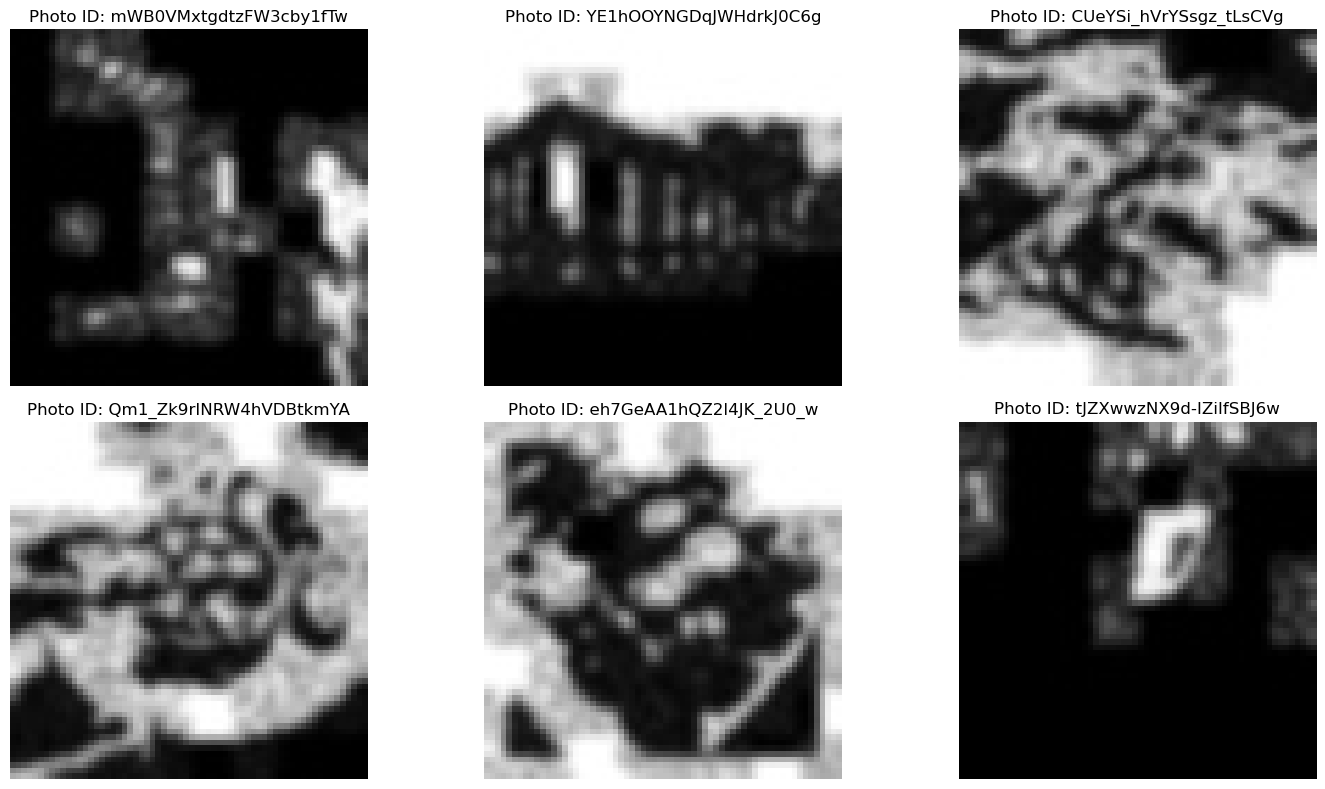

In [15]:
import os
import cv2
import matplotlib.pyplot as plt

# Folder where blurred images are stored
blurred_folder = 'C:/Users/rinua/Downloads/Yelp-Photos/Yelp Photos/yelp_photos/blurred_folder'

# Set up plot for displaying 6 images
plt.figure(figsize=(15, 8))  # Adjust size as needed

# Show first 6 images from the list
for i, entry in enumerate(sampled_data_list[:6]):
    photo_id = entry['photo_id']
    img_path = os.path.join(blurred_folder, photo_id + '_blurred.jpg')

    # Load image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is not None:
        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Photo ID: {photo_id}")
        plt.axis('off')
    else:
        print(f"Could not load image: {img_path}")

plt.tight_layout()
plt.show()
